# CSCI E-89 Deep Learning
## LAB 03: Simple Binary Classifier - Pima Indians Diabetes Dataset

### Introduction

A simple binary classifier example using Keras with TensorFlow. The model will classify whether an input belongs to class 0 or class 1. We will leverage Pima Indians Diabetes dataset, which contains medical data to predict the presence or absence of diabetes.

Epoch 1/50


/Users/umarala/anaconda3/envs/dl2025/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6314 - loss: 3.7708 - val_accuracy: 0.5691 - val_loss: 1.8724
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5723 - loss: 1.6080 - val_accuracy: 0.5772 - val_loss: 1.4289
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5703 - loss: 1.3650 - val_accuracy: 0.5528 - val_loss: 1.2624
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5540 - loss: 1.3102 - val_accuracy: 0.6179 - val_loss: 1.1903
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.5438 - loss: 1.2408 - val_accuracy: 0.5366 - val_loss: 1.0448
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5255 - loss: 1.1081 - val_accuracy: 0.5691 - val_loss: 1.0019
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.5764 - loss: 1.0225 - val_accuracy: 0.5691 - val_loss: 0.9637
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.5601 - loss: 0.9518 - val_accuracy: 0.6098 - val_loss: 0.92

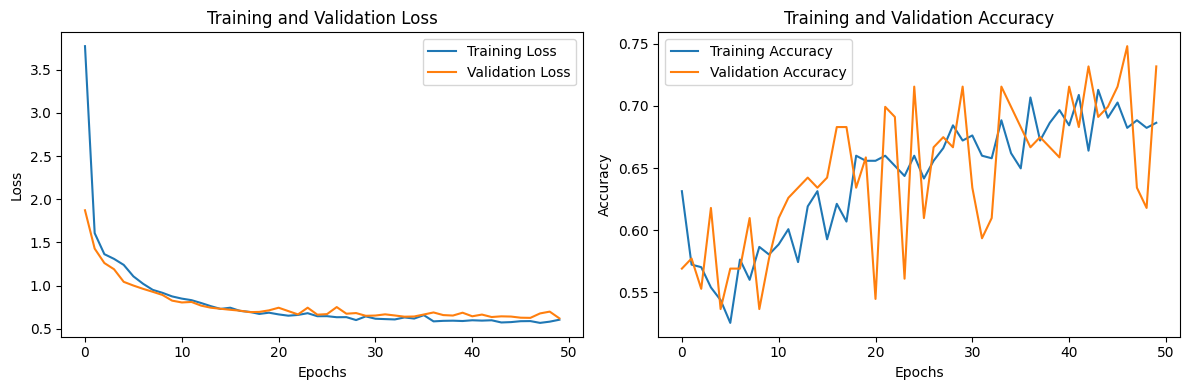

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the Pima Indians Diabetes dataset from a CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
dataset = np.loadtxt(url, delimiter=',')

# Split the dataset into input features (X) and target labels (y)
X = dataset[:, 0:8]  # First 8 columns are features
y = dataset[:, 8]    # Last column is the binary target label (0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the Keras model
model = models.Sequential([
    layers.Dense(12, input_shape=(8,), activation='relu'),  # First layer, input has 8 features
    layers.Dense(8, activation='relu'),                     # Second hidden layer
    layers.Dense(1, activation='sigmoid')                   # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification loss function
              metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X_train, y_train,
                    epochs=50, 
                    batch_size=10, 
                    validation_data=(X_val, y_val),  # Pass validation data
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()